In [225]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random

In [226]:
class fragment:
    """
    A class to implement the basic idea of a fragment.
    """
    def __init__(self, peak = 1, valley = 0, num = 2, y=0):
        self.peak = peak
        self.valley = valley
        self.num = num
        self.create_hinges()
        
    def create_hinges(self):
        self.hinges = list()
        self.hinges.append((0.,0.))
        for i in range(1, self.num + 1):
            self.hinges.append((random.uniform(self.hinges[i - 1][0], 1), random.uniform(self.valley, self.peak)))
            
        self.hinges.append((1.,1.))
        
    def __str__(self):
        return str(self.hinges)
    
    
    def compute_iteration(self, fragment_list=[]):
        if (len(fragment_list) == 0):
            for i in range(self.num):
                fragment_list.append(fragment(num=self.num))
        
        for i in range(len(self.hinges) - 2, -1, -1):
            frag = random.choice(fragment_list)
            frag_x_range = frag.hinges[-1][0] - frag.hinges[0][0]
            frag_y_range = frag.hinges[-1][1] - frag.hinges[0][1]

            if (frag_x_range == 0 or frag_y_range == 0):
                print('Fragment is undefined')
                return
            
            init_x, init_y = self.hinges[i]
            
            component_x_range = self.hinges[i + 1][0] - init_x
            component_y_range = self.hinges[i + 1][1] - init_y
            
            x_scale = component_x_range / frag_x_range
            y_scale = component_y_range / frag_y_range
            
            for j in range(frag.num):
                compute_x = frag.hinges[-2-j][0] * x_scale
                compute_y = frag.hinges[-2-j][1] * y_scale
                
                self.hinges.insert(i + 1, \
                                   (init_x + compute_x, \
                                   init_y + compute_y) \
                                  )
    
    def plot(self):
        x_vals = [hinge[0] for hinge in self.hinges]
        y_vals = [hinge[1] for hinge in self.hinges]
        plt.plot(x_vals, y_vals)
        
    def xy_lists(self):
        return list(zip(*self.hinges))
        
    def compute_deltas(self):
        deltas = list()
        for i in range(1, len(self.hinges)):
            if (self.hinges[i-1][1] != 0):
                deltas.append(self.hinges[i][1] - self.hinges[i-1][1])
            
        return deltas

In [227]:
class fragment_uniform_x(fragment):
    def create_hinges(self):
        self.hinges = list()
        x_vals = np.linspace(0, 1, self.num + 2)
        self.hinges.append((x_vals[0], 0.))
        for i in range(1, self.num + 1):
            self.hinges.append((x_vals[i], random.uniform(self.valley, self.peak)))
            
        self.hinges.append((x_vals[-1], 1.))

In [228]:
class fragment_tame(fragment):
    def create_hinges(self):
        self.hinges = list()
        x_vals = np.linspace(0, 1, self.num + 2)
        self.hinges.append((x_vals[0], 0.))
        for i in range(1, self.num + 1):
            self.hinges.append( \
                ( \
                 x_vals[i], \
                 random.uniform( \
                                max(self.valley, x_vals[i - 1]), \
                                min(self.peak, x_vals[i + 1]) \
                               )\
                ) \
            )
            
        self.hinges.append((x_vals[-1], 1.))

In [229]:
HINGE_NUM = 2 
COMPUTED_ITERATIONS = 7

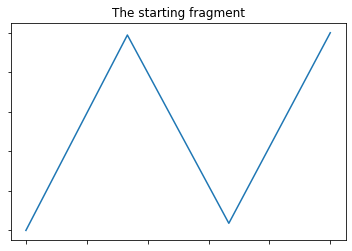

In [230]:
main_fragment = fragment_uniform_x(num = HINGE_NUM, valley = -.5)
main_frag_fig, main_frag_ax = plt.subplots()

x, y = main_fragment.xy_lists()

main_frag_ax.plot(x, y)
main_frag_ax.set_title("The starting fragment")
main_frag_ax.tick_params(
    which='both',
    label1On = False,
    label2On = False
)

In [231]:
candidate_fragments = [fragment_uniform_x(num = HINGE_NUM) for i in range(3)]

In [232]:
# candidate_fragments[0].hinges = [(0,0), (4/9,2/3), (5/9,1/3), (1,1)]
# candidate_fragments[1].hinges = [(0,0), (1/9,-1/3), (5/9,1/3), (1,1)]
# candidate_fragments[2].hinges = [(0,0), (4/9,2/3), (8/9,4/3), (1,1)]

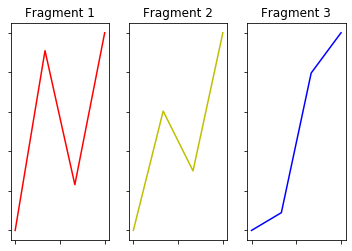

In [233]:
fragment_fig, fragment_axs = plt.subplots(1, 3)

color = ['r', 'y', 'b']

for i in range(3):
    x, y = candidate_fragments[i].xy_lists()
    fragment_axs[i].plot(x, y, color[i])
    fragment_axs[i].set_title("Fragment "+str(i + 1))
    fragment_axs[i].tick_params(
        which='both',
        label1On = False,
        label2On = False
    )

In [234]:
for i in range(COMPUTED_ITERATIONS):
    main_fragment.compute_iteration(candidate_fragments)

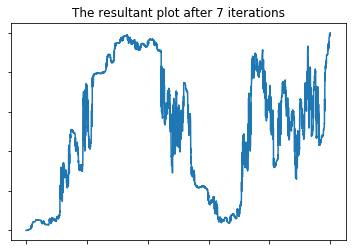

In [235]:
result_fig, result_axs = plt.subplots(1, 1)

x, y = main_fragment.xy_lists()

result_axs.plot(x, y)
result_axs.set_title("The resultant plot after " + str(COMPUTED_ITERATIONS) + " iterations")
result_axs.tick_params(
        which='both',
        label1On = False,
        label2On = False
    )

In [236]:
deltas = [0]
for i in range(1, len(main_fragment.hinges)):
    deltas.append(main_fragment.hinges[i][1] - main_fragment.hinges[i-1][1])

zscores = stats.zscore(deltas)

(10, -10)

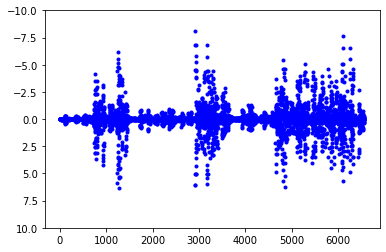

In [237]:
delta_fig, delta_ax = plt.subplots()

delta_ax.plot(zscores, 'b.', linestyle='None')
delta_ax.set_ylim(10, -10)